# Download dataset

In [ ]:

import requests
from win32con import NULLREGION

url = "https://wwwn.cdc.gov/Nchs/Data/Nhanes/Public/2021/DataFiles/DR1IFF_L.xpt"
response = requests.get(url)

with open("DR1IFF_L.xpt", "wb") as f:
    f.write(response.content)

print("File downloaded successfully.")

In [1]:
import pandas as pd
import numpy as np

df = pd.read_sas("DR1IFF_L.xpt")

# Display basic info
print(df.shape)

(100116, 84)


# Data Cleaning

In [2]:
clean_df = df[["DR1EXMER", "DR1_040Z", "DR1IKCAL"]].copy()
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100116 entries, 0 to 100115
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   DR1EXMER  100116 non-null  float64
 1   DR1_040Z  99787 non-null   float64
 2   DR1IKCAL  99787 non-null   float64
dtypes: float64(3)
memory usage: 2.3 MB


In [3]:
clean_df[clean_df["DR1IKCAL"].isna()]["DR1_040Z"].isna().sum() == clean_df[clean_df["DR1_040Z"].isna()]["DR1IKCAL"].isna().sum()

np.True_

In [4]:
# Drop missing value
clean_df.dropna(subset=["DR1IKCAL"], inplace=True)

clean_df = clean_df[clean_df["DR1_040Z"] != 9]

In [5]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99784 entries, 0 to 100115
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DR1EXMER  99784 non-null  float64
 1   DR1_040Z  99784 non-null  float64
 2   DR1IKCAL  99784 non-null  float64
dtypes: float64(3)
memory usage: 3.0 MB


In [6]:
# Rename columns
clean_df.columns = ["Interviewer_ID", "Eat_at_home", "Energy"]

clean_df["Interviewer_ID"] = clean_df["Interviewer_ID"].astype("int")
clean_df["Eat_at_home"] = clean_df["Eat_at_home"].astype("int")

In [7]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99784 entries, 0 to 100115
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interviewer_ID  99784 non-null  int64  
 1   Eat_at_home     99784 non-null  int64  
 2   Energy          99784 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 3.0 MB


# Descriptive Analysis

In [8]:
eat_at_home = clean_df[clean_df["Eat_at_home"] == 1]
eat_away_home = clean_df[clean_df["Eat_at_home"] == 2]

In [9]:
eat_at_home["Energy"].mean(), eat_away_home["Energy"].mean()

(np.float64(128.67346884371875), np.float64(130.7917121046892))

In [10]:
eat_at_home["Energy"].std(), eat_away_home["Energy"].std()

(np.float64(184.67637726199442), np.float64(179.61356752764596))

In [11]:
eat_at_home_energy = eat_at_home["Energy"]
eat_away_home_energy = eat_away_home["Energy"]

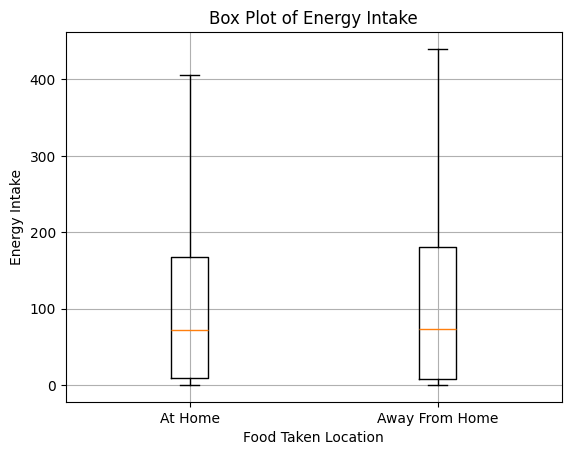

In [14]:
import matplotlib.pyplot as plt

plt.boxplot([eat_at_home_energy, eat_away_home_energy],
            showfliers=False,
            tick_labels=["At Home", "Away From Home"])
plt.title("Box Plot of Energy Intake")
plt.ylabel("Energy Intake")
plt.xlabel("Food Taken Location")
plt.grid(True)
plt.show()

# Inferential Statistics

In [13]:
from scipy import stats

t_stat, p_val = stats.ttest_ind(eat_at_home_energy, eat_away_home_energy)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("✅ Significant difference between groups.")
else:
    print("❌ No significant difference between groups.")


T-statistic: -1.5756
P-value: 0.1151
❌ No significant difference between groups.
